In [17]:
import pandas as pd
import numpy as np
data = pd.read_csv('v2.csv')

In [18]:
data['player']=data['player'].str.replace('k','0')
data=data.astype({'player':'float64','action':'float64'})
data = data.set_index("session")
data = data.drop('6BAEA86C4EBD5B4851F69CBA0FE8A95F',axis=0)
data = data.drop('4DA94925470532CB71BA7C9673164089',axis=0)
data = data.drop('B46C7FCB426AC08FFB0CD8AB914137F3',axis=0)
data = data.drop('6BA54DBB4EF5A79F4FEAD7AAC68597DA',axis=0)
data = data.drop('E592B6E447196B11F05595BB8A4E5F70',axis=0)
data.reset_index(drop=False,inplace=True)
data = data.set_index("player")
data = data.drop(222222222,axis=0)
data.sort_values(by=["player"], inplace=True)
data['time']=(data['time']/60)
numerica=data[['action','time','level']]
data['action'] = data['action'].replace([0],'Inicio de nivel')
data['action'] = data['action'].replace([1],'Accion en nivel')
data['action'] = data['action'].replace([3],'Termino de nivel')
data['action'] = data['action'].replace([2],'Reinicio de nivel')

In [19]:
data=data.astype({'action':'object'})
data.info()
numerica.corr().abs()[["time"]]

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1560 entries, 172672884.0 to 219167393.0
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   session    1560 non-null   object 
 1   level      1560 non-null   object 
 2   action     1560 non-null   object 
 3   time       1560 non-null   float64
 4   state      1560 non-null   object 
 5   timestamp  1560 non-null   object 
dtypes: float64(1), object(5)
memory usage: 85.3+ KB


,time
action,0.101921
time,1.000000


In [20]:
from plotnine import *

from plotnine import *

bins = list(range(0, 13, 1))
numerica["conteoTiempos"] = pd.cut(numerica["time"], bins=bins)
numerica = numerica.set_index("level")
#PARA HACER CALCULOS CON DENSIDAD DESCOMENTAR TODO
numerica = numerica.drop('Union_Interseccion',axis=0)
numerica = numerica.drop('Velocidad_y_fuerza',axis=0)
#numerica = numerica.drop('Densidad_de_Objetos',axis=0)
numerica = numerica.drop('Mirrors_1',axis=0)
numerica = numerica.drop('NIVEL_FINAL',axis=0)


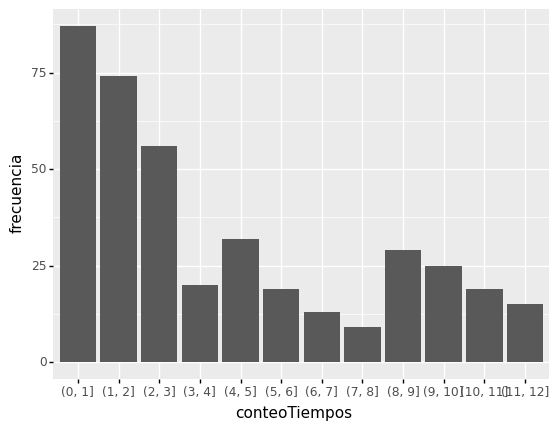

<ggplot: (-9223371904572474728)>

In [21]:

conteoTiempos=(numerica.groupby('conteoTiempos' ).agg(frecuencia=("time", "count")).reset_index())


ggplot(conteoTiempos) + geom_bar(aes(x = "conteoTiempos", y = "frecuencia"), stat = 'identity')

In [22]:
#media aritmetica
mediana=numerica["time"].mean()
#desviacion media
desviacionMedia=numerica["time"].mad()
#varianza aritmetica,no omite valores faltantes
varianza=numerica["time"].var(ddof=0)
#desviacion tipica
desviacionTipica=numerica["time"].std(ddof=0)
print('El conjunto de  {} \nMediana : {}\nVarianza: {}\nDesviacionMedia: {}\nDesviacionTipica: {}'.format('niveles',mediana,varianza,desviacionMedia,desviacionTipica))

El conjunto de  niveles 
Mediana : 4.65936329588015
Varianza: 17.46815327750424
DesviacionMedia: 3.6300189370029035
DesviacionTipica: 4.179491987969858


In [165]:
#La dispesion se ve con esta formula,entonces  la comparacion desviaciones tipicas por nivel
(numerica
 .groupby("level")
 .agg(dispercionTiempo=("time", "std")))


,dispercionTiempo
level,
Densidad_de_Objetos,3.375531
Mirrors_1,4.184196
NIVEL_FINAL,0.000000
Union_Interseccion,0.518463
Velocidad_y_fuerza,2.143736


In [167]:
conteoTiempos["frecuencia_acum"] = conteoTiempos["frecuencia"].cumsum()
conteoTiempos



,conteoTiempos,frecuencia,frecuencia_acum
0,"(0, 1]",581,581
1,"(1, 2]",265,846
2,"(2, 3]",152,998
3,"(3, 4]",91,1089
4,"(4, 5]",60,1149
5,"(5, 6]",47,1196
6,"(6, 7]",34,1230
7,"(7, 8]",28,1258
8,"(8, 9]",44,1302
9,"(9, 10]",33,1335


In [150]:
data=data.astype({'action':'string'})
data.reset_index(inplace = True, drop = False)
data[(data.action == 'Inicio de nivel')& (data.level=='NIVEL_FINAL') ]

,player,session,level,action,time,state,timestamp
195,172672884.0,B5E821B046054D37C48CB2B44A50617D,NIVEL_FINAL,Inicio de nivel,0.0,"Inicio del nivel,Player 1: Stahn, Player2: Leon",2020-12-03 02:11:39.149585
364,186693060.0,E1FB139B416893650F0B5CA7DF7EB4BE,NIVEL_FINAL,Inicio de nivel,0.0,"Inicio del nivel,Player 1: zirion, Player2: fs...",2020-12-20 20:04:18.721707
410,191336488.0,1E21EFD4491F566EEC56E6ABE9EC7804,NIVEL_FINAL,Inicio de nivel,0.0,"Inicio del nivel,Player 1: Vincent, Player2: V...",2020-12-20 19:33:37.159074
832,195160872.0,078E0F784B8F647BEE95B9A051B78D6E,NIVEL_FINAL,Inicio de nivel,0.0,"Inicio del nivel,Player 1: nico, Player2: drak",2020-11-27 00:08:08.266095
984,197299339.0,E1F0D1504FD8506672B8BDAF24D09E9B,NIVEL_FINAL,Inicio de nivel,0.0,"Inicio del nivel,Player 1: Claudio, Player2: M...",2020-12-18 20:25:03.859441
1075,197299339.0,E8D3CF9C421324215943ED8C82DE314C,NIVEL_FINAL,Inicio de nivel,0.0,"Inicio del nivel,Player 1: Claudio, Player2: M...",2020-11-27 20:44:48.229018
1141,197299339.0,37C815AC4084B15AD138BF856B40BDEC,NIVEL_FINAL,Inicio de nivel,0.0,"Inicio del nivel,Player 1: Claudio, Player2: M...",2020-12-18 17:59:06.954106
1461,215504441.0,10F69F9B4B671F621E5391BC0C9A0398,NIVEL_FINAL,Inicio de nivel,0.0,"Inicio del nivel,Player 1: dio, Player2: jotaro",2020-12-28 02:02:33.152362
1515,219167393.0,F80779C24FFF15903563FEA2C8AB0372,NIVEL_FINAL,Inicio de nivel,0.0,"Inicio del nivel,Player 1: LUCAS, Player2: BENJA",2020-12-27 23:04:20.296057


In [151]:
import seaborn as sns
import matplotlib.pyplot as plt 

hue_colors = {'Inicio de nivel': 'yellow',
              'Accion en nivel': 'blue',
              'Reinicio de nivel': 'green',
              'Termino de nivel': 'red'}

sizes_actions = {'Accion en nivel': 10, 
              'Inicio de nivel': 50, 
              'Termino de nivel': 50,
              'Reinicio de nivel': 50}

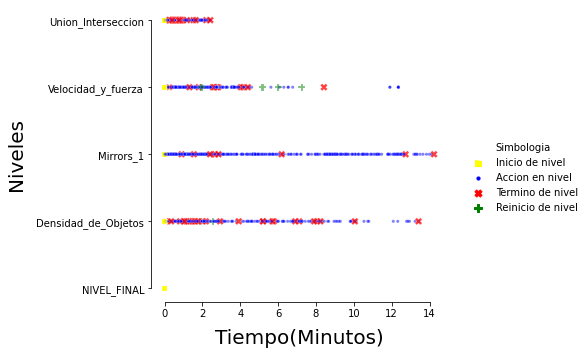

In [17]:
orden= ['Inicio de nivel','Accion en nivel','Termino de nivel','Reinicio de nivel']
g=sns.relplot(data=data,x='time',y='level',hue='action',hue_order=orden,size='action',sizes=sizes_actions,style='action',alpha=.5,palette=hue_colors, height=6)
g.set_axis_labels("Tiempo(Minutos)", "Niveles", labelpad=10,fontsize=20)
g.legend.set_title("Simbologia")
g.fig.set_size_inches(8.5, 4.5)
g.despine(trim=True)

<AxesSubplot:xlabel='time', ylabel='level'>

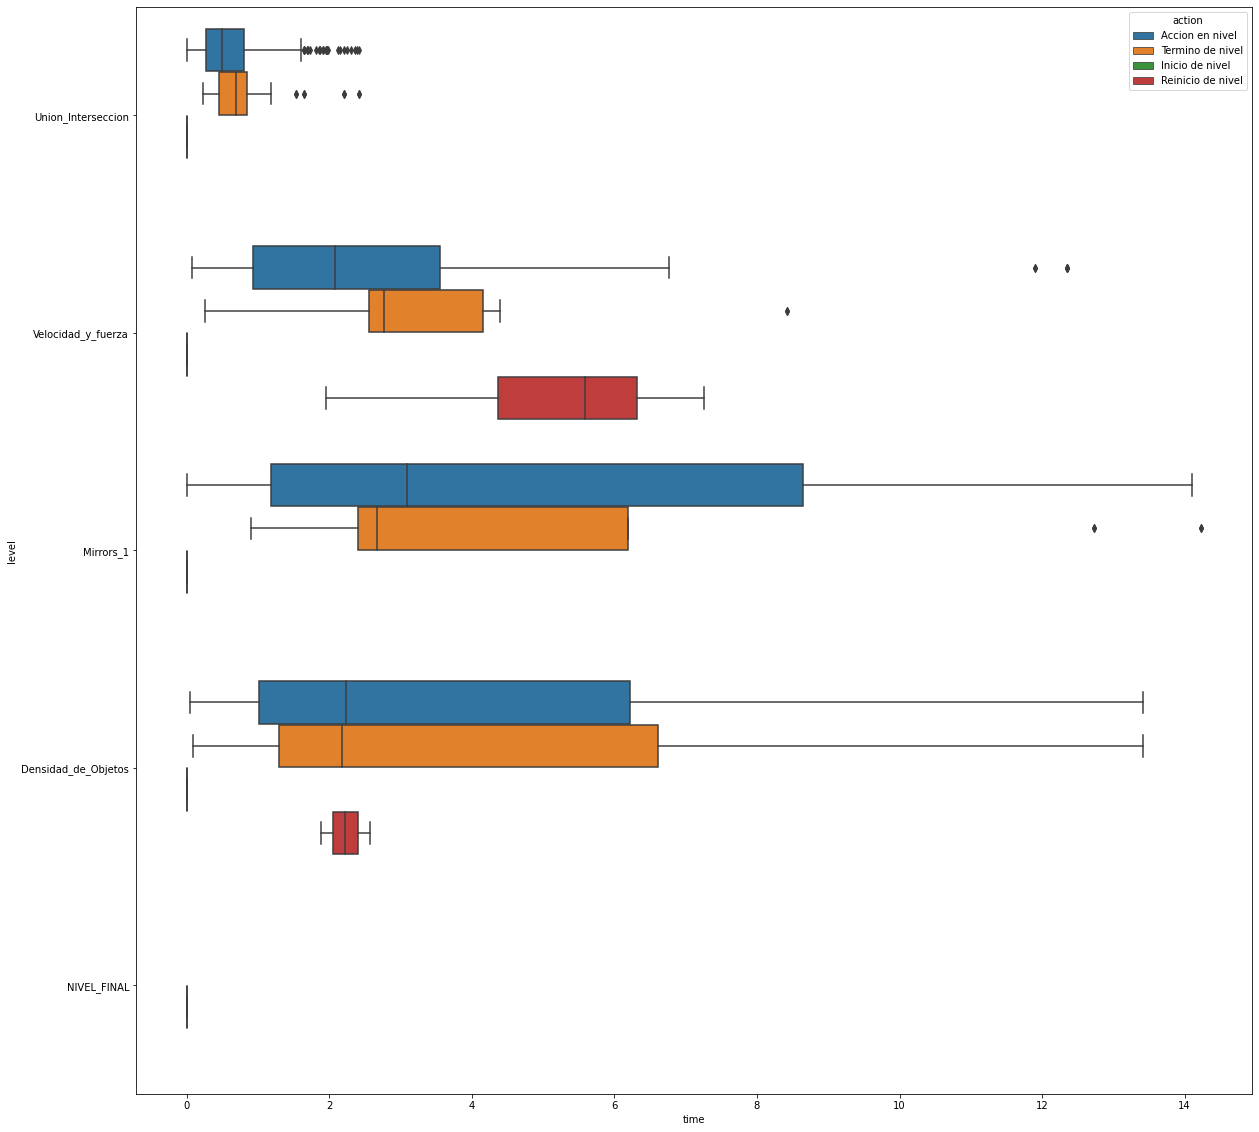

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt 
fig, axs = plt.subplots(ncols=2, figsize=(20,20))
sns.swarmplot(x="time", y="level", hue="action", data=data, ax=axs[0])
sns.boxplot(x="time", y="level", hue="action", data=data, ax=axs[1])

In [156]:
import plot_likert as pl

In [157]:
encuesta=pd.read_csv("colaboracion.csv",sep=";")
indexTime = encuesta[ encuesta['Timestamp'] == '12/20/2020 21:21:38' ].index
encuesta.drop(indexTime , inplace=True)
encuesta['rut']=encuesta['rut'].str.replace('.','')
encuesta['rut']=encuesta['rut'].str.replace('-','')
encuesta=encuesta.astype({'rut':'float64'})


In [158]:
encuesta.columns

Index(['Timestamp', 'rut', 'emocion1', 'historia1', 'historia2', 'emocion2',
       'multiplayer', 'interdependencia1', 'interdependencia2',
       'interdependencia3', 'metacomun1', 'metacomun2', 'metacomun3',
       'ayudamutua1', 'ayudamutua2'],
      dtype='object')

<AxesSubplot:xlabel='Number of Responses'>

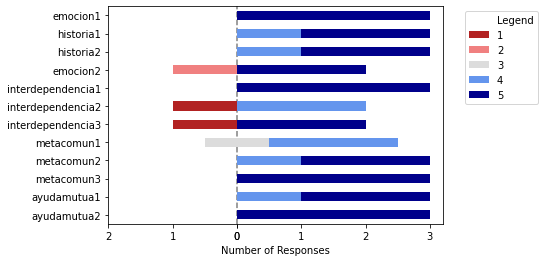

In [159]:
#2 PERSONAS REALIZARON EL JUEGO EN MODALIDAD MULTIPLAYER y se agrego una copia del registro del rut 21.550.444.1 como un rut 21.111.111-1 para tener un total de 3 registros de esa manera poder hacer uso de plotliker ya que para funcionar utiliza un minimo de 3 registros.

d2=encuesta[encuesta.multiplayer =='Si']
d2=d2[["emocion1","historia1","historia2","emocion2","interdependencia1","interdependencia2",
"interdependencia3","metacomun1","metacomun2","metacomun3","ayudamutua1","ayudamutua2"]]
escala=[1,2,3,4,5]
pl.plot_likert(d2,escala)

<AxesSubplot:xlabel='Number of Responses'>

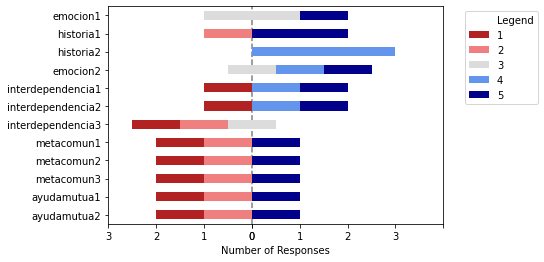

In [132]:
#3 PERSONAS REALIZARON EL JUEGO EN MODALIDAD SINGLEPLAYER
d1=encuesta.astype(str).query("multiplayer=='No'")
d1=d1[["emocion1","historia1","historia2","emocion2","interdependencia1","interdependencia2",
"interdependencia3","metacomun1","metacomun2","metacomun3","ayudamutua1","ayudamutua2"]]
pl.plot_likert(d1,pl.scales.raw5)

In [160]:
encuesta[(encuesta.rut == 194218346.0 ) & (encuesta.Timestamp=='12/30/2020 20:44:00')]

,Timestamp,rut,emocion1,historia1,historia2,emocion2,multiplayer,interdependencia1,interdependencia2,interdependencia3,metacomun1,metacomun2,metacomun3,ayudamutua1,ayudamutua2
5,12/30/2020 20:44:00,194218346.0,3,2,4,3,No,4,4,2,2,2,2,2,2


In [161]:

noTerminaron=[]
noTerminaron.append(encuesta[ encuesta['rut'] == 191367357.0].index)
noTerminaron.append(encuesta[ encuesta['rut'] == 194218346.0].index)
noTerminaron.append(encuesta[ encuesta['rut'] == 211111111.0].index)
for indice in range(len(noTerminaron)):
    encuesta.drop(noTerminaron[indice] , inplace=True)
encuesta

# 190376109 NO JUGO EL JUEGO Y LO EVALUO.Se procedera a eliminarlo del dataset de colaboracion para asi evitar problemas en el analisis.

#Eliminando los rut (193167357,194218346) que no completaron el juego en su totalidad para analizar los que realmente obtuvieron una experiencia de juego completa.

#Se determino que  2 personas completaron el juego y en modalidad multiplayer
#Los siguientes datos nos muestran que en interdependencia2 se encontraron las notas mas bajas 1 para 219167393.0 y 4 para 215504441.0.
#Mientras que en emocion,interdependencia1,metacomun3 y ayudamutua2 se ven reflejadas las notas mas altas siendo estas un 5.

#Observando el grafico anterior,podemos ver que existen notas bajas de 2 personas que no jugaron  en esta nueva version,por lo cual su feedback sera descartado.
# No obstante existe un jugador con rut 194218346 que se quedo atascado en el nivel de velocidad y fuerza , esto se puede ver claramente al ver sus 3 sesiones donde  siempre queda en el mismo nivel.En sus notas se puede observar claramente su descontento calificando el juego en varias preguntas con nota 2.

# Como tambien el rut 193167357(191367357) no identifico correctamente el patron de corona en el nivel de los espejos y finalizo su sesion.Sus califaciones son bastante positivabas respecto a historia y emociones.Esta sesion correspondio a una modalidad singleplayer donde no hubo interacciones con otras personas por eso las califaciones bajas en interdependica,metacomun y ayudamutua.
#En este caso metacomun3 cuenta con una nota bastante baja y  habla de los controles del juego,por eso para la ultima version open beta se habla sobre los controles en cada nivel con el fin de mejorar la puntuacion para proximos analisis .

  

,Timestamp,rut,emocion1,historia1,historia2,emocion2,multiplayer,interdependencia1,interdependencia2,interdependencia3,metacomun1,metacomun2,metacomun3,ayudamutua1,ayudamutua2
3,12/27/2020 20:10:12,219167393.0,5,4,4,2,Si,5,1,1,3,4,5,4,5
4,12/27/2020 23:13:20,215504441.0,5,5,5,5,Si,5,4,5,4,5,5,5,5


In [134]:
#Teniendo en cuenta que el juego se penso como un nuevo tipo de enseñanza a distancia y de colaboracion para un aprendizaje mas entretenido.
#Esto apunta claramente a analizar la informacion de aquellos jugadores que finalizaron el juego y fueron de la modalidad multiplayer local.
#Se observa que las notas en promedio estuvieron en la calificacion 4, donde la colaboracion efectivamente se comprueba en el campo ayudamutua

#Tambien se puede ver que en emocion y historia tiene una buena aceptacion de parte de los estudiantes donde se verifica que el juego es entretenido y original.Ademas este factor es sumamente importante ya que al ser emocionante todos los contenidos vistos son mas rapidos de memorizar segun estudios cientificos.

#En el area de interdependencia(1,2,3) se encuentran las menores califaciones debido a su falta de coordinacion en las decisiones grupales,pero tambien el analisis  muestra que puede resolverse en su totalidad de manera individual(interdependencia2) salvo en el nivel de velocidad y fuerza.No existe manera de mitigar estas calificaciones en interdependencia(1,3) ya que son externas a nuestro control porque dependen de la coordinacion de los jugadores.

#Finalmente en el campo meta comun(1,2,3) que es el aprendizaje en cuestion esta siendo efectivo ya que las calificiones se encuentran en su mayoria en la nota 4 esto nos da cuenta que un videojuego puede ser usado para enseñar distintas materias.